In [17]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
#Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [19]:
#Read in the training dataset and print the number of rows and columns as well as the first 5 rows of the dataframe
loan = pd.read_csv('/content/drive/MyDrive/AAI510/MODULE1/home-credit-default-risk/application_train.csv')
print('Training dataset size:' , loan.shape)
print(loan.head())

Training dataset size: (307511, 122)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \


The top ten most relevant variable are the ones that are applicable to the majority of the instances in the training set. For this reason, any variable that is missing values for 50% or more of the instances is dropped from the dataset.  

In [20]:
#Remove columns that contain NA in at least 50% of the rows
loan.dropna(axis=1, thresh=153756, inplace=True)
print('New size:' , loan.shape)
print(loan.head())

New size: (307511, 81)
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...        

In [21]:
#Store remaining columns
variables = list(loan.columns.values)

From the remaining variables, AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE are relevant as they provide information on the loan size, repayment term, and the cost of what the loan is being used for. AMT_INCOME_TOTAL, OCCUPATION_TYPE, NAME_EDUCATION_TYPE, DAYS_BIRTH, and DAYS_EMPLOYED are relevant as they summarize an individual's ability to repay the loan. FLAG_OWN_CAR and FLAG_OWN_REALTY indicate whether the individual has collateral in the event where they cannot repay the loan. 

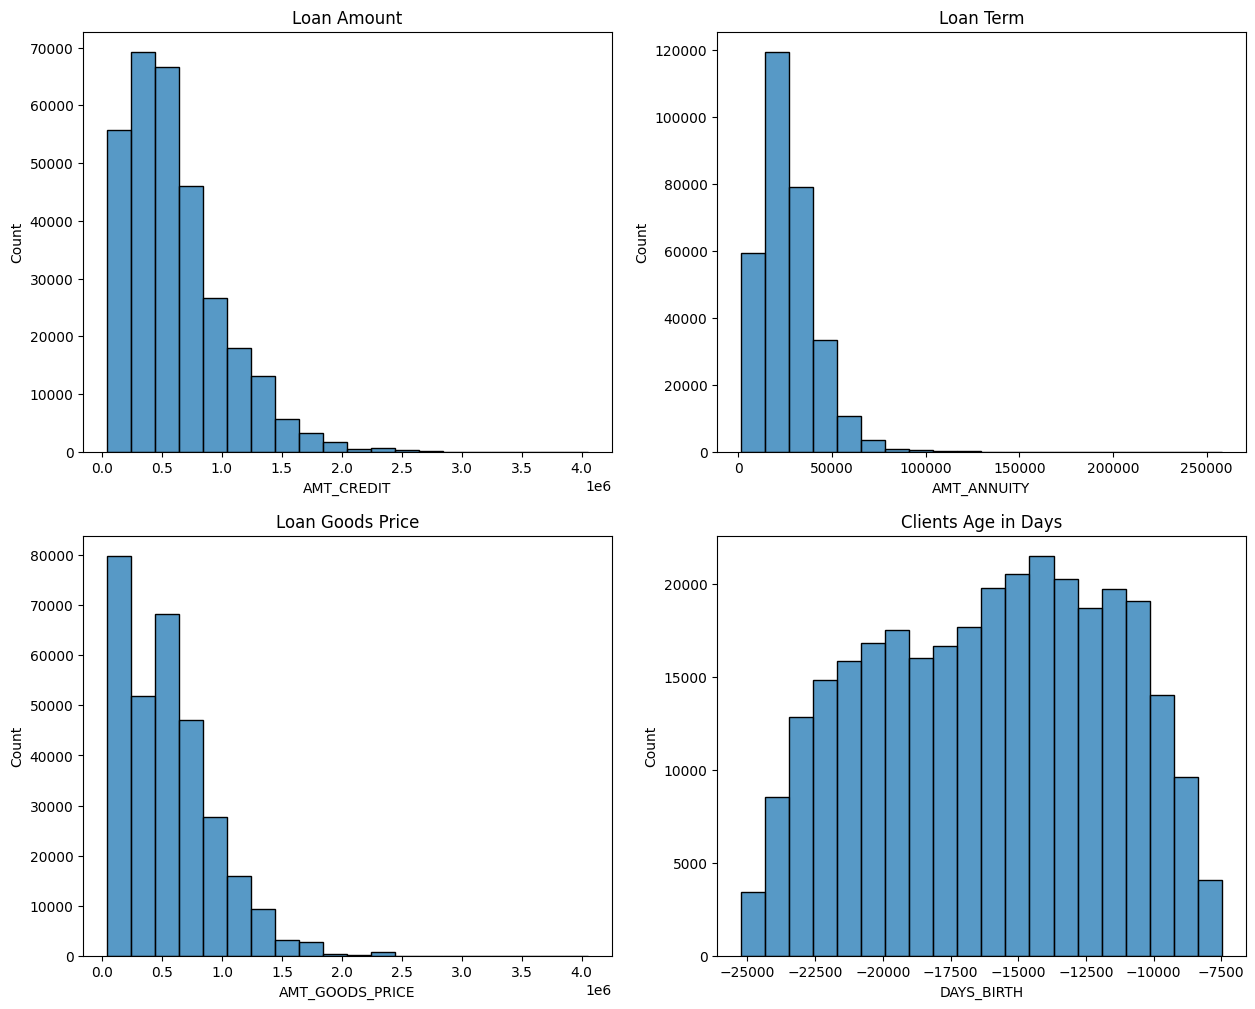

In [22]:
#AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, and DAYS_BIRTH are all continuous variables
#and can be illustrated using histograms
fig, axes = plt.subplots(2, 2, figsize=(15,12))
sns.histplot(ax=axes[0][0], data=loan, x='AMT_CREDIT', bins=20)
axes[0][0].set_title('Loan Amount')

sns.histplot(ax=axes[0][1], data=loan, x='AMT_ANNUITY', bins=20)
axes[0][1].set_title('Loan Term')

sns.histplot(ax=axes[1][0], data=loan, x='AMT_GOODS_PRICE', bins=20)
axes[1][0].set_title('Loan Goods Price')

sns.histplot(ax=axes[1][1], data=loan, x='DAYS_BIRTH', bins=20)
axes[1][1].set_title('Clients Age in Days')
plt.show()

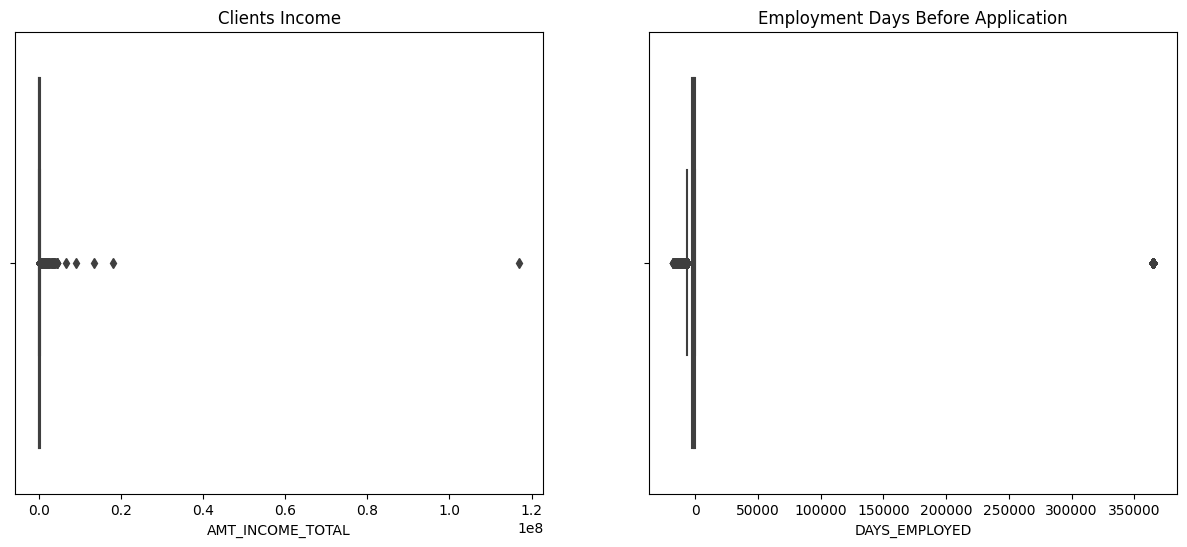

In [23]:
#AMT_INCOME, and DAYS_EMPLOYED are box continuous variables with extreme outliers
#and can be illustrated using boxplots
fig, axes = plt.subplots(1, 2, figsize=(15,6))
sns.boxplot(ax=axes[0], data=loan, x='AMT_INCOME_TOTAL')
axes[0].set_title('Clients Income')

sns.boxplot(ax=axes[1], data=loan, x='DAYS_EMPLOYED')
axes[1].set_title('Employment Days Before Application')
plt.show()
print('\n') #pdf printing purposes
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')

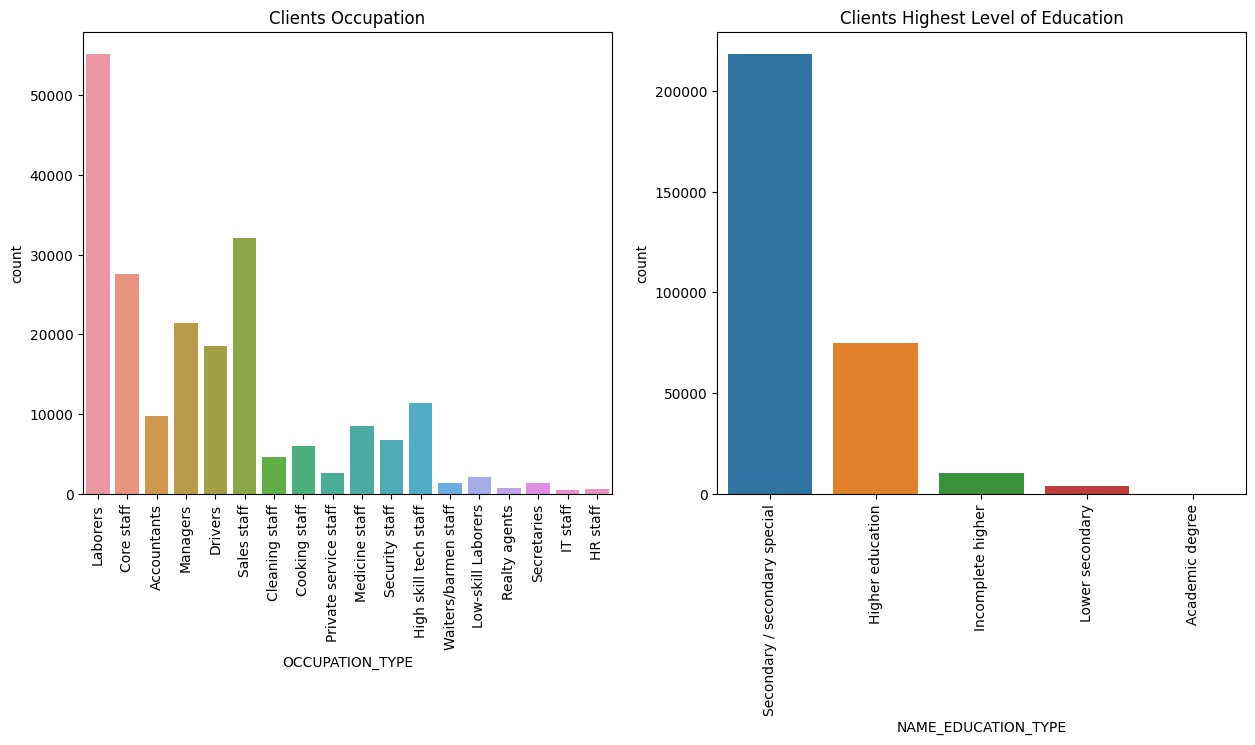

In [24]:
#OCCUPATION_TYPE and NAME_EDUCATION_TYPE are both categorical variables and can be
#illustrated using countplot
fig, axes = plt.subplots(1, 2,figsize=(15, 6))
sns.countplot(ax=axes[0], data=loan, x='OCCUPATION_TYPE')
axes[0].set_title('Clients Occupation')
axes[0].tick_params(axis='x', rotation=90)

sns.countplot(ax=axes[1], data=loan, x='NAME_EDUCATION_TYPE')
axes[1].set_title('Clients Highest Level of Education')
axes[1].tick_params(axis='x', rotation=90)
plt.show()
print('\n') #pdf printing purposes
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')
print('\n')

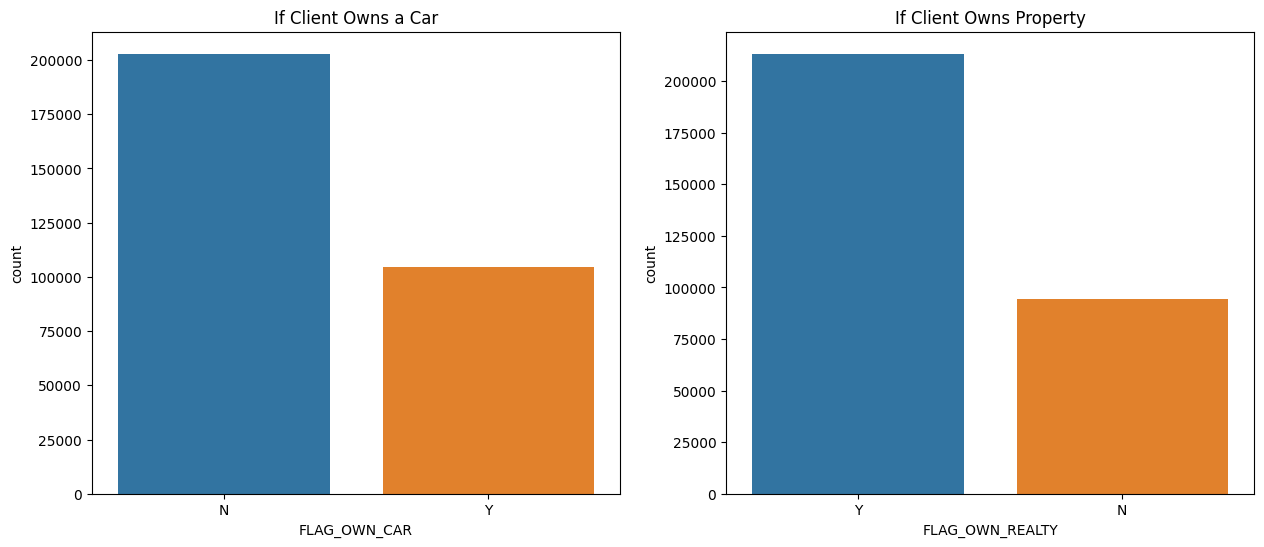

In [25]:
#FLAG_OWN_CAR and FLAG_OWN_REALTY are both bianry variables and can be treated like
#categorical variables to be illustrated using countplot
fig, axes = plt.subplots(1, 2,figsize=(15, 6))
sns.countplot(ax=axes[0], data=loan, x='FLAG_OWN_CAR')
axes[0].set_title('If Client Owns a Car')

sns.countplot(ax=axes[1], data=loan, x='FLAG_OWN_REALTY')
axes[1].set_title('If Client Owns Property')
plt.show()

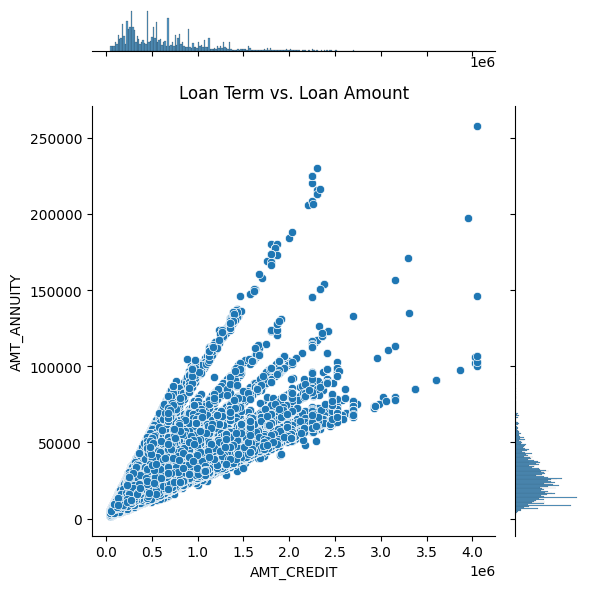

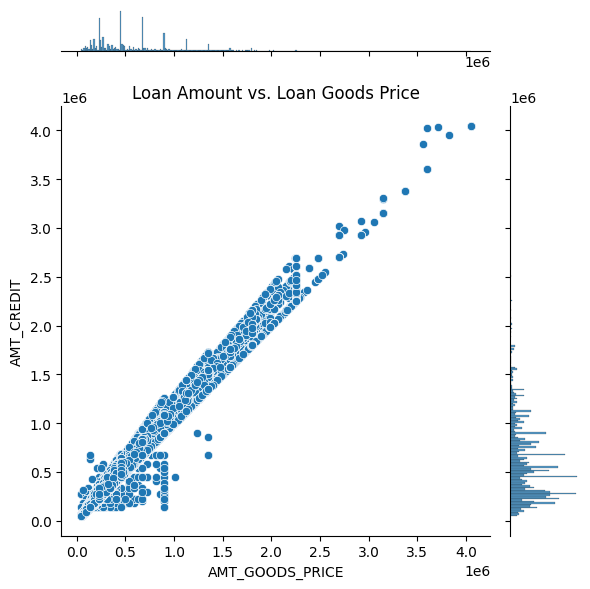

In [26]:
#The continuous variables AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE can be 
#analyzed by the relationship between the loan size and the repayment term as well as 
#the loan size and the cost of the good the loan is being used for
joint = sns.jointplot(data=loan, x='AMT_CREDIT', y='AMT_ANNUITY')
plt.title('Loan Term vs. Loan Amount')
joint.fig.tight_layout()
plt.show()

joint = sns.jointplot(data=loan, x='AMT_GOODS_PRICE', y='AMT_CREDIT')
plt.title('Loan Amount vs. Loan Goods Price')
joint.fig.tight_layout()
plt.show()

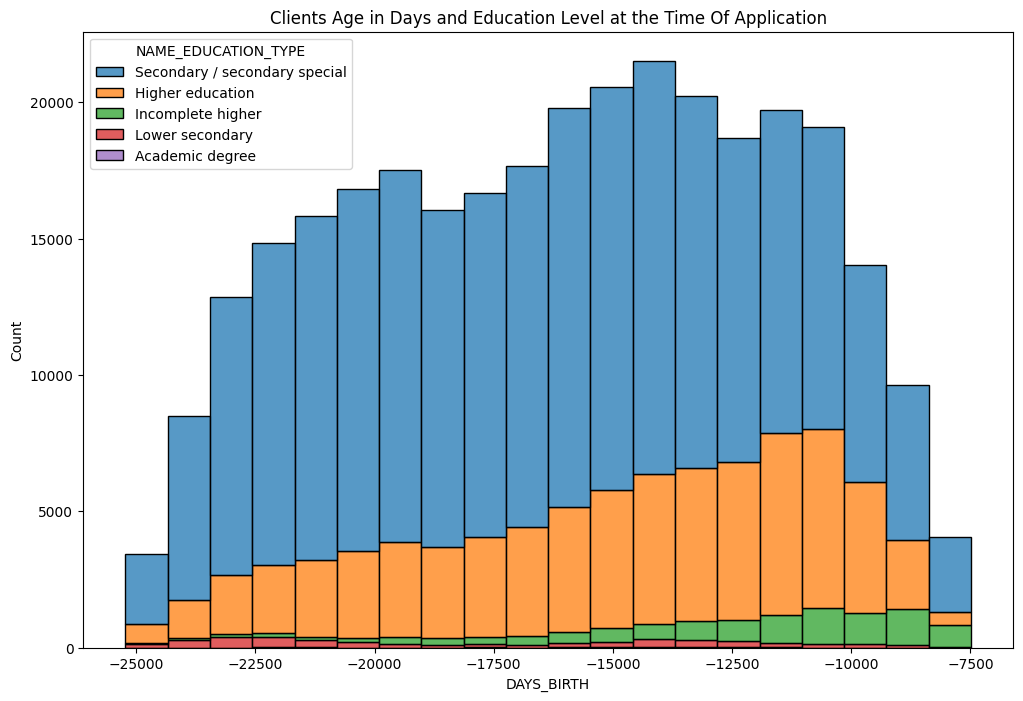

In [27]:
#The relationship between the ages  and the highest level of education completed 
#can be visualized
fig, ax = plt.subplots(figsize=(12, 8))
sns.histplot(data=loan, x='DAYS_BIRTH', hue='NAME_EDUCATION_TYPE', multiple='stack',bins=20, ax=ax)
plt.title('Clients Age in Days and Education Level at the Time Of Application')
plt.show()

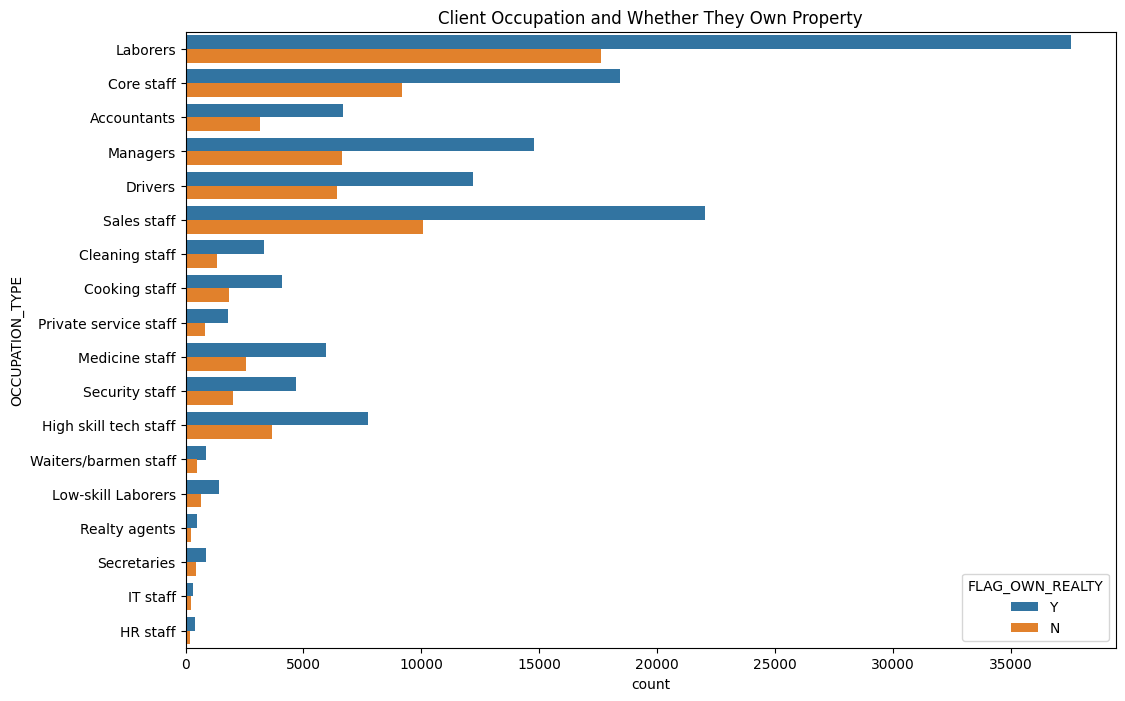

In [28]:
#The relationship between the different occupations and whether they own property 
#can be analyzed
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(data=loan, y="OCCUPATION_TYPE", hue="FLAG_OWN_REALTY")
plt.title('Client Occupation and Whether They Own Property')
plt.show()